Notebook to download and collate cited cases with their parenthetical holdings

In [1]:
import pandas
holdings_df = pandas.read_csv("./parentheticals-2023-12-04.csv")

In [2]:
print(len(holdings_df))

1225897


In [3]:
print(holdings_df.head)

<bound method NDFrame.head of               id                                               text     score  \
0        2618061  “The imposition of lifetime parole is not tant...  0.464000   
1        1598538  "the [trial] court must make factual findings ...  0.526035   
2        1946880  explaining that the phrase change of circumsta...  0.800000   
3        1335394  separate convictions for simple possession and...  0.509328   
4         239069  applying traditional debt/equity factors to re...  0.687856   
...          ...                                                ...       ...   
1225892  2814594  “In order for a court to have specific jurisdi...  0.458431   
1225893  2814595  “When a litigant files a shotgun pleading, is ...  0.389696   
1225894  2781238  concluding that if the plaintiff is given the ...  0.829907   
1225895  2800104  holding that a 28-page complaint with 123 para...  0.900000   
1225896  2814596  “[W]e have repeatedly held that a District Cou...  0.500000  

In [4]:
token_file_path = './court_listener_token.txt'  # Adjust the path if the file is in a different directory

# Reading the API token from the file
with open(token_file_path, 'r') as file:
    api_token = file.read().strip()

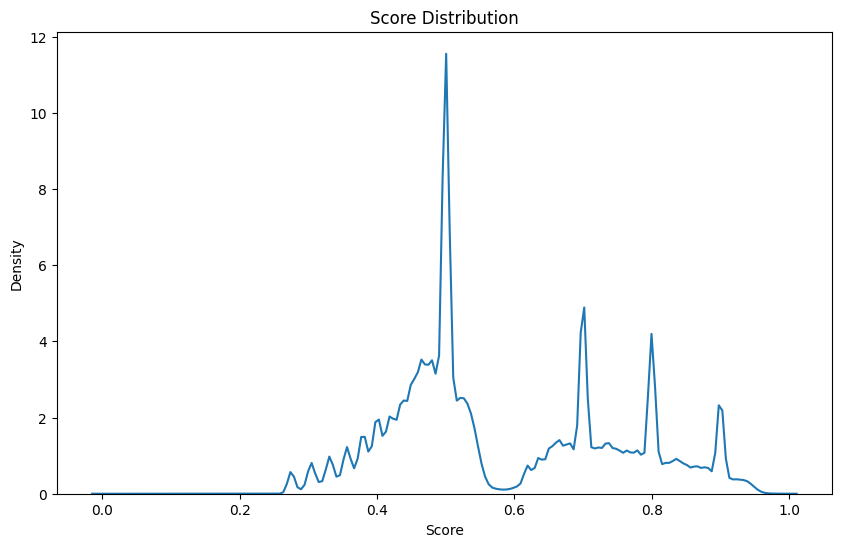

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the column that holds the score is named 'score', adjust if it's different
# Plotting the distribution of scores using KDE
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.kdeplot(holdings_df['score'], bw_adjust=0.5)  # Adjust bw_adjust for smoother or less smooth curves
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Density')

plt.show()


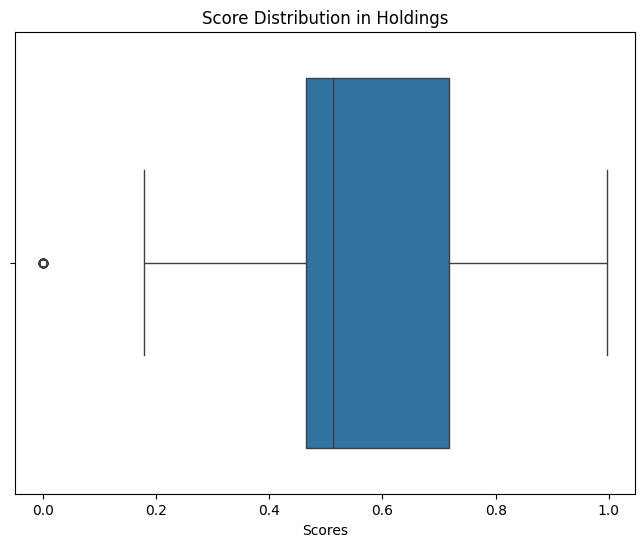

In [7]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(x=holdings_df['score'])
plt.title('Score Distribution in Holdings')
plt.xlabel('Scores')

plt.show()

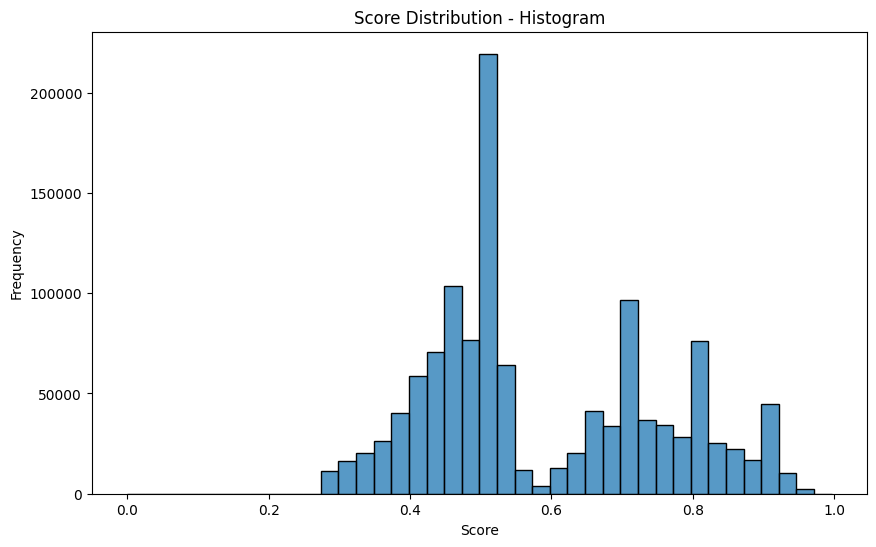

In [8]:
# Creating a histogram for the scores with intervals of 0.025
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(holdings_df['score'], bins=int(1/0.025), kde=False)  # KDE is set to False to only show the histogram
plt.title('Score Distribution - Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.show()

Manual inspection of parentheticals to find the best cuttoff scores. First take values between .2 and .4

In [ ]:
score_view_2_5_df = holdings_df[(holdings_df['score'] >= .2) & (holdings_df['score'] < .5)]
print(len(score_view_2_5_df))

427485


Then take slice of just .2 to .3

In [ ]:
score_view_2_df = score_view_2_5_df[score_view_2_5_df['score'] < .3]
print(len(score_view_2_df))

11354


In [ ]:
print(score_view_2_df.head)

<bound method NDFrame.head of               id                                               text     score  \
126      2790638                declining options in CR 76.12(8)(c)  0.275000   
253      2082477             providing myriad examples of conflicts  0.275000   
541       170639                 dealing with a predecessor statute  0.275000   
546      1355368         constitutional violation must cause injury  0.282526   
645      2429311               using a “reasonable likelihood” rule  0.275000   
...          ...                                                ...       ...   
1224993  2327655    describ- ing statutory construction methodology  0.275000   
1225098  1016619              discussing origins of remedies clause  0.275000   
1225146  1023623             primary purpose of breathalyzer policy  0.275000   
1225314  2531673  A suspect has "the right to remain silent, tha...  0.284000   
1225628  2639124                   setting forth standard of review  0.275000  

In [ ]:
print(score_view_2_df.iloc[200]["text"])

factors applied to motor vehicle


.2-.3 seem pretty bad, look at .3-.4

In [ ]:
score_view_3_df = score_view_2_5_df[(score_view_2_5_df['score'] >= .3) & (score_view_2_5_df['score'] < .4)]
print(len(score_view_3_df))
print(score_view_3_df.head)

103767
<bound method NDFrame.head of               id                                               text     score  \
6        1263855  court did not plainly err in finding that the ...  0.396811   
7        2783517  plaintiff brought “independent action” under R...  0.331000   
10       2814597                        “In re SRBA Case No. 39576”  0.304000   
14       2618062        “The type of punishment imposed is parole.”  0.331000   
18        227629  court reporters not entitled to absolute immunity  0.368963   
...          ...                                                ...       ...   
1225861  2782233  interpreting "exceptional" based on dictionary...  0.304000   
1225878  2671807  ‘‘[T]he relationship must arise out of contact...  0.396811   
1225885  2755573  “[M]ere injury to a forum resident is not a su...  0.382424   
1225891  2008514  discussing “minimum contacts” necessary to cre...  0.356000   
1225893  2814595  “When a litigant files a shotgun pleading, is ...  0.3

In [ ]:
print(score_view_3_df.iloc[-1]["text"])

“When a litigant files a shotgun pleading, is represented by counsel, and fails to request leave to amend, a district court must sua sponte give him one chance to replead before dismissing his case with prejudice on non-merits shotgun pleading grounds.” (emphasis added)


In [ ]:
score_view_4_df = score_view_2_5_df[(score_view_2_5_df['score'] >= .4)]
print(len(score_view_4_df))
print(score_view_4_df.head)

312364
<bound method NDFrame.head of               id                                               text     score  \
0        2618061  “The imposition of lifetime parole is not tant...  0.464000   
8        2779087  “Section 2D1.1(b)(1) applies ‘if the weapon wa...  0.451000   
9         586794  though buyer had accepted invoices containing ...  0.447275   
12       1859426  “An absence of material conflicts of interest ...  0.477373   
13       2475608  “Where there is no record of the testimony of ...  0.441905   
...          ...                                                ...       ...   
1225883  2586728  “[A]lthough physical presence in the forum is ...  0.423632   
1225884  2570174  “Calder made clear that mere injury to a forum...  0.417181   
1225886  2771034  “The proper question is not where the plaintif...  0.477373   
1225890  2495859  “[M]ere injury to a forum resident is not a su...  0.464000   
1225892  2814594  “In order for a court to have specific jurisdi...  0.4

In [ ]:
print(score_view_4_df.iloc[3]["text"])

“An absence of material conflicts of interest between the named plaintiffs and their counsel with other class members is central to adequacy . . . .” (emphasis added)


In [ ]:
score_view_5_df = holdings_df[(holdings_df['score'] >= .55) & (holdings_df['score'] < .6)]
print(len(score_view_5_df))
print(score_view_5_df.head)

13184
<bound method NDFrame.head of               id                                               text     score  \
129       237427  real estate partners feared that "paper trail"...  0.558029   
467       221563  “duty of inquiry” arises once “circumstances w...  0.552070   
505       837213  equitable tolling will stay running of statuto...  0.555437   
589      2709986  describing weight to be given to “conclusively...  0.567425   
630      2660955  ‘‘[n]otwithstanding the great deference accord...  0.596811   
...          ...                                                ...       ...   
1225476   206341  “[T]he issue of [what] Miranda requires . . . ...  0.553338   
1225477   585300  consolidated Miranda cases all involved questi...  0.552248   
1225664  2471449  permitting the issuance of a certificate of ap...  0.582424   
1225714   598539  free-speech interest of employee must be weigh...  0.552765   
1225782  2762905  recognizing similar potential government inter...  0.57

In [ ]:
print(score_view_5_df.iloc[4]['text'])

‘‘[n]otwithstanding the great deference accorded the trial court in dissolution proceedings, a trial court’s ruling . . . may be reversed if, in the exer- cise of its discretion, the trial court applies the wrong standard of law’’ (internal quotation marks omitted)


Around .5 score is where most of the data are, but there seem to be a lot of parentheticals that are just excerpting quotes, which is not what I want. Check to see how many are not quotes.

In [ ]:
view_5_non_quote_df = score_view_5_df[~score_view_5_df['text'].str.slice(start=0, stop=5).str.contains('["\'\[\“\”\‘\’]', regex=True, na=False)]
print(len(view_5_non_quote_df))
print(view_5_non_quote_df.head)

8608
<bound method NDFrame.head of               id                                               text     score  \
129       237427  real estate partners feared that "paper trail"...  0.558029   
505       837213  equitable tolling will stay running of statuto...  0.555437   
589      2709986  describing weight to be given to “conclusively...  0.567425   
931      1059124  unless a contrary indication exists, court ass...  0.559949   
1055     2663752  stating a determination of the rights conferre...  0.596811   
...          ...                                                ...       ...   
1225475   205340  examin­ ing the “history and precedent underly...  0.565659   
1225477   585300  consolidated Miranda cases all involved questi...  0.552248   
1225664  2471449  permitting the issuance of a certificate of ap...  0.582424   
1225714   598539  free-speech interest of employee must be weigh...  0.552765   
1225782  2762905  recognizing similar potential government inter...  0.575

In [ ]:
print(view_5_non_quote_df.iloc[-2]['text'])

free-speech interest of employee must be weighed against employer's interest in performing public services efficiently


Based on this, >= .6 is the best cutoff in terms of ensuring quality, the question is whether to include scores in the .5 range with some filtering for quotes.

In [ ]:
score_view_6_df = holdings_df[(holdings_df['score'] >= .6) & (holdings_df['score'] < .7)]
print(len(score_view_6_df))
print(score_view_6_df.head)

109282
<bound method NDFrame.head of               id                                               text     score  \
4         239069  applying traditional debt/equity factors to re...  0.687856   
19       1573739  rejecting a challenge by demurrer to an indict...  0.673482   
21        264993  stating right to jury trial concerning every e...  0.668377   
41       2090319  refusing to follow Allison because it “would n...  0.610557   
42       1398016             recognizing that W.Va.Code § 29-12-5(a  0.675000   
...          ...                                                ...       ...   
1225854  2792860  interpreting the phrase “exceptional cases” an...  0.677373   
1225855  2799099  interpreting the phrase “exceptional cases” an...  0.677373   
1225857  2814586  remanding for exceptionality determination und...  0.658431   
1225867   571405  overruling, in an opinion joined by ten of the...  0.691702   
1225887  2396301  reversing the Ninth Circuit’s application of t...  0.6

In [ ]:
print(score_view_6_df.iloc[-4]['text'])

interpreting the phrase “exceptional cases” and setting forth basic guidelines for determining whether or not a request for at- torney fees in patent infringement cases may be granted


In [ ]:
score_view_6_9_df = holdings_df[(holdings_df['score'] >= .6)]
print(len(score_view_6_9_df))

502058


In [ ]:
grouped_counts = score_view_6_9_df.groupby('described_opinion_id').size()

# Reset the index to turn the Series into a DataFrame, if needed
grouped_counts_df = grouped_counts.reset_index(name='count')

# Display the result
print(len(grouped_counts_df))

216463


Now begin actually downloading cases via the API by matching them with their case ID. It seems that most if not all cases are stored in a JSON object with html tags, so I'll need to strip this and get the plaintext.

In [5]:
import requests

# test the API
test_id = "599121"
url = f'https://www.courtlistener.com/api/rest/v3/opinions/{test_id}/'

# Making the GET request to the URL
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
    # Parsing the response to JSON
    data = response.json()
    case_html = data["html"]
else:
    print(f"Failed to fetch data: Status code {response.status_code}")
    data = {}

In [6]:
print(data)

{'resource_uri': 'https://www.courtlistener.com/api/rest/v3/opinions/599121/', 'id': 599121, 'absolute_url': '/opinion/599121/united-states-v-daniel-f-aversa-united-states-of-america-v-vincent/', 'cluster_id': 599121, 'cluster': 'https://www.courtlistener.com/api/rest/v3/clusters/599121/', 'author_id': None, 'author': None, 'joined_by': [], 'date_created': '2011-08-23T03:22:47-07:00', 'date_modified': '2020-02-22T02:39:31.953924-08:00', 'author_str': '', 'per_curiam': False, 'joined_by_str': '', 'type': '010combined', 'sha1': 'ec8afc18df54bbadf4f139519776e5def596c99c', 'page_count': None, 'download_url': 'http://bulk.resource.org/courts.gov/c/F2/984/984.F2d.493.91-1574.91-1364.91-1363.html', 'local_path': None, 'plain_text': '', 'html': '<p class="case_cite">984 F.2d 493</p>\n    <p class="case_cite">61 USLW 2471</p>\n    <p class="parties">UNITED STATES of America, Appellee,<br>v.<br>Daniel F. AVERSA, Defendant, Appellant.<br>UNITED STATES of America, Appellee,<br>v.<br>Vincent MENTO,

In [7]:
from bs4 import BeautifulSoup
import markdown

soup = BeautifulSoup(case_html, 'html.parser')
text = soup.get_text(separator='\n')

# Convert basic HTML formatting to Markdown (optional)
# This step tries to preserve basic formatting like bold or italic by converting them to Markdown syntax
# For more complex HTML, this might not work perfectly and might need adjustments
markdown_text = markdown.markdown(text)

print(markdown_text)

<p>984 F.2d 493</p>
<p>61 USLW 2471</p>
<p>UNITED STATES of America, Appellee,
v.
Daniel F. AVERSA, Defendant, Appellant.
UNITED STATES of America, Appellee,
v.
Vincent MENTO, Defendant, Appellant.
UNITED STATES of America, Appellee,
v.
William J. DONOVAN, Defendant, Appellant.</p>
<p>Nos. 91-1363, 91-1364 and 91-1574.</p>
<p>United States Court of Appeals,
First Circuit.</p>
<p>Heard Oct. 8, 1992.
Decided Jan. 13, 1993.</p>
<p>Robert V. Johnson II, Concord, NH, for defendant-appellant Aversa.</p>
<p>David A. Ross, with whom Eaton, Solms, McIninch &amp; Phillips, Manchester, NH, was on brief, for defendant-appellant Mento.</p>
<p>Jonathan R. Saxe, with whom Twomey &amp; Sisti Law Offices, Concord, NH, was on brief, for defendant-appellant Donovan.</p>
<p>Peter E. Papps, First Asst. U.S. Atty., with whom Jeffrey R. Howard, United States Attorney, Concord, NH, and Richard A. Friedman, Attorney, Dept. of Justice, Washington, DC, were on brief, for U.S.</p>
<p>Before BREYER, Chief Judge, C

If you compare the text to how it looks on [CourtListener](https://www.courtlistener.com/opinion/599121/united-states-v-daniel-f-aversa-united-states-of-america-v-vincent/?type=o&q=&type=o&order_by=score%20desc&stat_Precedential=on&citation=984%20F.2d%20493), it's clear that some of numbers in their own line are paragraph numbering, but some are footnotes. I'm not really sure how to deal with this. Possibly I could use the href links as a way to spot the footnotes, but unclear on what I should actually do with the footnotes. Maybe move them in the text after the relevant sentence? Have some kind of footnote tag?

In [8]:
better_soup = BeautifulSoup(case_html, 'html.parser')

# Convert <br> and <p> to newline characters
for br in better_soup.find_all("br"):
    br.replace_with("\n")
for p in better_soup.find_all("p"):
    p.append("\n")  # Add a newline after each <p> content

# Extract text, using '\n' as a separator between tags
text = better_soup.get_text(separator="\n", strip=True)

# Post-processing to clean up text
text = "\n".join([line for line in text.splitlines() if line.strip()])

print(text)

984 F.2d 493
61 USLW 2471
UNITED STATES of America, Appellee,
v.
Daniel F. AVERSA, Defendant, Appellant.
UNITED STATES of America, Appellee,
v.
Vincent MENTO, Defendant, Appellant.
UNITED STATES of America, Appellee,
v.
William J. DONOVAN, Defendant, Appellant.
Nos. 91-1363, 91-1364 and 91-1574.
United States Court of Appeals,
First Circuit.
Heard Oct. 8, 1992.
Decided Jan. 13, 1993.
Robert V. Johnson II, Concord, NH, for defendant-appellant Aversa.
David A. Ross, with whom Eaton, Solms, McIninch & Phillips, Manchester, NH, was on brief, for defendant-appellant Mento.
Jonathan R. Saxe, with whom Twomey & Sisti Law Offices, Concord, NH, was on brief, for defendant-appellant Donovan.
Peter E. Papps, First Asst. U.S. Atty., with whom Jeffrey R. Howard, United States Attorney, Concord, NH, and Richard A. Friedman, Attorney, Dept. of Justice, Washington, DC, were on brief, for U.S.
Before BREYER, Chief Judge, COFFIN and BOWNES, Senior Circuit Judges, TORRUELLA, SELYA, CYR and BOUDIN, Circui

In [9]:
import re

# Remove standalone numbers without a period. Must do this before removing periods below.
text = re.sub(r'^\s*\d+\s*$', '', text, flags=re.MULTILINE)

In [10]:
print(text)

984 F.2d 493
61 USLW 2471
UNITED STATES of America, Appellee,
v.
Daniel F. AVERSA, Defendant, Appellant.
UNITED STATES of America, Appellee,
v.
Vincent MENTO, Defendant, Appellant.
UNITED STATES of America, Appellee,
v.
William J. DONOVAN, Defendant, Appellant.
Nos. 91-1363, 91-1364 and 91-1574.
United States Court of Appeals,
First Circuit.
Heard Oct. 8, 1992.
Decided Jan. 13, 1993.
Robert V. Johnson II, Concord, NH, for defendant-appellant Aversa.
David A. Ross, with whom Eaton, Solms, McIninch & Phillips, Manchester, NH, was on brief, for defendant-appellant Mento.
Jonathan R. Saxe, with whom Twomey & Sisti Law Offices, Concord, NH, was on brief, for defendant-appellant Donovan.
Peter E. Papps, First Asst. U.S. Atty., with whom Jeffrey R. Howard, United States Attorney, Concord, NH, and Richard A. Friedman, Attorney, Dept. of Justice, Washington, DC, were on brief, for U.S.
Before BREYER, Chief Judge, COFFIN and BOWNES, Senior Circuit Judges, TORRUELLA, SELYA, CYR and BOUDIN, Circui

Just download the data I can worry about cleaning it later.

In [11]:
good_holdings_df = holdings_df[(holdings_df['score'] >= .6)]
print(len(good_holdings_df))

502058


In [12]:
print(len(good_holdings_df['described_opinion_id'].unique()))

216463


In [18]:
import pandas as pd
import requests
import time

results = []

# Calculate delay between requests to stay under the rate limit (5000 requests per hour)
# delay = 3600 / 5000  # seconds per request
delay = .5  # wait a shorter amount of time because the request takes some time to come back
# Start time tracking for rate limiting
start_time = time.time()

# Count the number of requests
request_count = 0
tot_req = 0
ckpt = 0

headers = {
    'Authorization': f'Token {api_token}'
}

# Iterate over each unique ID in the dataframe
# good_holdings_df is the one with scores over .6
for case_id in good_holdings_df['described_opinion_id'].unique():
    if request_count >= 5000:
        # Calculate elapsed time
        print(f'You made {request_count} requests')
        elapsed_time = time.time() - start_time
        if elapsed_time < 3600:
            # If the limit is reached before an hour, wait for the remainder of the hour
            print(f"Rate limit reached. Waiting for {3600 - elapsed_time} seconds.")
            time.sleep(3600 - elapsed_time)

        # Reset the count and timer
        request_count = 0
        start_time = time.time()

    url = f'https://www.courtlistener.com/api/rest/v3/opinions/{case_id}/'

    # Making the GET request to the URL
    response = requests.get(url, headers=headers)
    max_attempts = 5  # Maximum number of attempts to try
    attempts = 0  # Current attempt count
    
    # Start the retry loop
    while attempts < max_attempts:
        attempts += 1  # Increment the attempt counter
        response = requests.get(url, headers=headers)
    
        if response.status_code == 200:
            # If the request was successful, break out of the loop
            break
        elif response.status_code == 429:
            # If a 429 status code is received, read the Retry-After header
            retry_after = int(response.headers.get('Retry-After', 60))  # Default to 60 seconds if the header is missing
            print(f"Rate limit exceeded. Retrying after {retry_after} seconds.")
            time.sleep(retry_after)
    
    request_count += 1
    tot_req += 1

    if response.status_code == 200:
        # Parsing the response to JSON and extracting 'html'
        data = response.json()
        
        # Check if 'html' field is present and not an empty string
        if 'html' in data and data['html'].strip():
            case_html = data["html"]
            # Append the ID and HTML to the results list
            results.append({'described_opinion_id': case_id, 'data': data, 'case_html': case_html})
        else:
            # If 'html' is missing or an empty string, add it but leave the case_html field null
            results.append({'described_opinion_id': case_id, 'data': data, 'case_html': None})
    else:
        print(f"Failed to fetch data for ID {case_id}: Status code {response.status_code}")

    if tot_req % 5000 == 0:
        temp_df = pd.DataFrame(results)
        temp_df.to_json("./scrape_checkpoint.json", orient="records")
        ckpt += 1
        print(f"Saved checkpoint json number {ckpt}")
        print(f"You have made {tot_req} requests so far")
    # Implement the delay to stay within the rate limit
    time.sleep(delay)

# Convert the results into a dataframe
case_html_df = pd.DataFrame(results)


ConnectionError: HTTPSConnectionPool(host='www.courtlistener.com', port=443): Max retries exceeded with url: /api/rest/v3/opinions/8591877/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000236504ECC70>: Failed to resolve 'www.courtlistener.com' ([Errno 11001] getaddrinfo failed)"))

In [19]:
print(tot_req)

11


In [17]:
temp_df = pd.DataFrame(results)
temp_df.to_json("./scrape_checkpoint.json", orient="records")
print(temp_df.head)

<bound method NDFrame.head of       described_opinion_id                                               data  \
0                  3708514  {'resource_uri': 'https://www.courtlistener.co...   
1                  1689935  {'resource_uri': 'https://www.courtlistener.co...   
2                  1678589  {'resource_uri': 'https://www.courtlistener.co...   
3                   710878  {'resource_uri': 'https://www.courtlistener.co...   
4                   794316  {'resource_uri': 'https://www.courtlistener.co...   
...                    ...                                                ...   
2959               1656791  {'resource_uri': 'https://www.courtlistener.co...   
2960                390308  {'resource_uri': 'https://www.courtlistener.co...   
2961                790966  {'resource_uri': 'https://www.courtlistener.co...   
2962               1371348  {'resource_uri': 'https://www.courtlistener.co...   
2963               1959229  {'resource_uri': 'https://www.courtlistener.co...  

In [ ]:
print(case_html_df.head)

In [ ]:
case_html_df.to_json("./scraped_cases.json", orient="records")

In [ ]:
# Merge the new dataframe with the original holdings_df on 'described_opinion_id'
# merged_df = good_holdings_df.merge(case_html_df, on='described_opinion_id', how='left')

# Now merged_df contains both the original columns from holdings_df and the 'case_html' for each described_opinion_id